In [ ]:
### training set será del 1 de enero del 2017 al 31 de enero del 2022
### test set será el mes de febrero del 2022

### Importacion de las librerias ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_train = pd.read_csv("/content/dataset_ts_ventas_train.csv")
print(dataset_train)
   
#### definicion del training set compuesto por el número de bebidas vendidas ###
training_set = dataset_train.iloc[:,2:3].values

### escalado de la variable "numero de bebidas vendidas" ###
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaler = sc.fit_transform(training_set)

### construccion del tensor X_train e y_train para el posterior proceso de 
### entrenamiento de la red neuronal ###
X_train = []
y_train = []
for i in range(60, 1261):
    X_train.append(training_set_scaler[i-60: i, 0])
    y_train.append(training_set_scaler[i])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

              ds  precio_ref  unidades_total  monto_total
0     2017-01-01       990.0             158       142740
1     2017-01-02       990.0             152       137180
2     2017-01-03       990.0             125       115390
3     2017-01-04       990.0             107        98710
4     2017-01-05       990.0             103        96270
...          ...         ...             ...          ...
1849  2022-01-27      1100.0              63        68510
1850  2022-01-28      1100.0              85        93088
1851  2022-01-29      1100.0              95       103920
1852  2022-01-30      1100.0              62        67375
1853  2022-01-31      1100.0              68        74100

[1854 rows x 4 columns]


In [ ]:
####### modelado de la red neuronal ######
### Importación de la capa secuencial, densa, LSTM y dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()
### Primera Capa Oculta de la Red Neuronal ###
regressor.add(LSTM(units = 50, return_sequences = True, 
                   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.1))

### Segunda Capa Oculta de la Red Neuronal ###
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.1))

### Tercera Capa Oculta de la Red Neuronal ###
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.1))

### Cuarta Capa Oculta de la Red Neuronal ###
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.1))

### Quinta Capa Oculta de la Redn Neuronal
regressor.add(LSTM(units = 50))
regressor.add(Dropout(rate = 0.1))

### Capa de Salida de la Red Neuronal
regressor.add(Dense(units = 1))

regressor.compile(optimizer = "RMSprop", loss = "mean_squared_error")

regressor.fit(X_train, y_train, epochs = 150, batch_size = 32, verbose = True)


Epoch 1/150
38/38 [==============================] - 18s 168ms/step - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2/150
38/38 [==============================] - 7s 186ms/step - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 3/150
38/38 [==============================] - 6s 167ms/step - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 4/150
33/38 [=========================>....] - ETA: 0s - loss: 0.0158 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
######## Etapa de predicción de datos ########
##### unidades de bebidas vendidas en el mes de febrero del 2022 #####
dataset_test = pd.read_csv("/content/dataset_ts_ventas_test.csv")
print(dataset_test)
real_stock_price = dataset_test.iloc[:, 2:3].values
########################################################


dataset_total = pd.concat((dataset_train["unidades_total"], dataset_test["unidades_total"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
## Se crea un nuevo tensor para poder predecir el mes de febrero del 2022
## el cual posee 29 dias por eso va desde el 60 al 89
for i in range(60, 89):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
### Se crea una instancia para que la red neuronal haga una predicción 
predicted_stock_price = regressor.predict(X_test)
### La predicción entrega los resultados normalizados, por lo tanto se debe quitar esta 
### normalización para observar el verdadero resultado 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



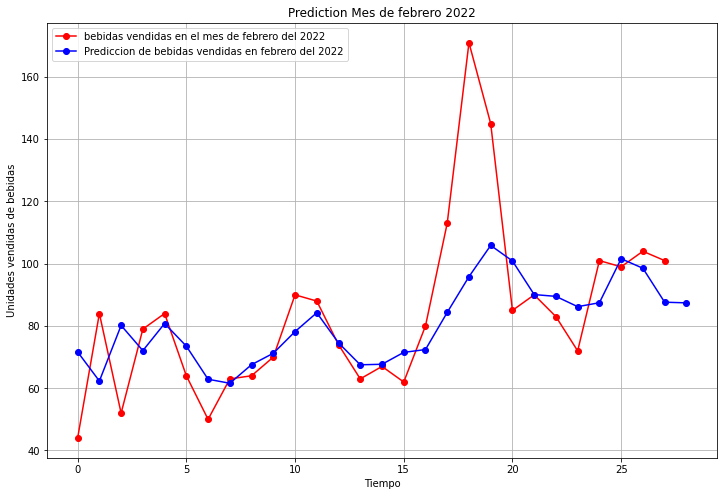

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(real_stock_price, color = 'red', label = "bebidas vendidas en el mes de febrero del 2022", marker = "o")
ax.plot(predicted_stock_price, color = 'blue', label = "Prediccion de bebidas vendidas en febrero del 2022", marker = "o")
ax.set_title("Prediction Mes de febrero 2022")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Unidades vendidas de bebidas")
ax.grid()
ax.legend()


In [ ]:
predicted_stock_price

array([[ 71.66372 ],
       [ 62.30475 ],
       [ 80.17572 ],
       [ 72.07864 ],
       [ 80.78514 ],
       [ 73.51556 ],
       [ 62.885067],
       [ 61.597637],
       [ 67.56851 ],
       [ 71.230804],
       [ 78.18567 ],
       [ 84.25022 ],
       [ 74.56658 ],
       [ 67.527565],
       [ 67.69411 ],
       [ 71.51635 ],
       [ 72.424934],
       [ 84.35    ],
       [ 95.83891 ],
       [105.88166 ],
       [100.88465 ],
       [ 90.085754],
       [ 89.50858 ],
       [ 86.20123 ],
       [ 87.46681 ],
       [101.603645],
       [ 98.538925],
       [ 87.63725 ],
       [ 87.4225  ]], dtype=float32)

In [ ]:
prediccion = np.delete(predicted_stock_price, -1, 0)

In [ ]:
prediccion

In [ ]:
from sklearn.metrics import mean_squared_error
# Error test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = real_stock_price,
                y_pred = prediccion
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 413.5243468953714
